# Support Vector Machine Vs Stochastic Gradient Decent 

In [1]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

In [4]:
df = pd.read_csv("./data/example.csv", delimiter='\t')
df.head()

,a,b,o
0,1.0,2.0,1
1,2.0,3.0,1
2,3.0,4.0,1
3,4.0,5.0,1
4,5.0,6.0,1


In [8]:
SVMClassifier = SVC(kernel='linear')
SGDClassifier = linear_model.SGDClassifier(max_iter=100)

In [9]:
SVMModel = SVMClassifier.fit(df[['a', 'b']], df['o'])
SGDModel = SGDClassifier.fit(df[['a', 'b']], df['o'])

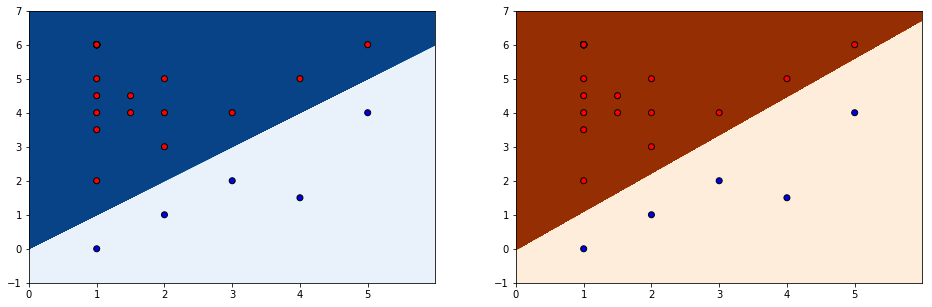

In [19]:
# Create a Meshgrid
x_min, x_max = df.iloc[:, 0].min() - 1, df.iloc[:, 0].max() + 1
y_min, y_max = df.iloc[:, 1].min() - 1, df.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))

# Predict From Model
Z_SVM = SVMModel.predict(np.c_[xx.ravel(), yy.ravel()])
Z_SVM = Z_SVM.reshape(xx.shape)

Z_SGD = SGDModel.predict(np.c_[xx.ravel(), yy.ravel()])
Z_SGD = Z_SGD.reshape(xx.shape)

# Plot Meshgrid and Points
plt.figure(figsize=(16, 5))
color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}
colors = [color_map[y] for y in df['o']]


plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_SVM, cmap=plt.cm.Blues)
plt.scatter(df.iloc[:, 0],df.iloc[:, 1], c=colors, edgecolors='black')

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_SGD, cmap=plt.cm.Oranges)
plt.scatter(df.iloc[:, 0],df.iloc[:, 1], c=colors, edgecolors='black')


# plt.axis('off')